# opencv
## 제공하는 기능
- 이미지 형식 변환
- 크기 및 색상 변환
- 필터링, 얼굴 인식, 물체 인식, 문자 인식

In [1]:
# !pip install opencv-python    # already installed

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
# 이미지 읽기
!curl -L https://www.dropbox.com/s/v4225z25x0zz4y3/pool.jpg \
    -o pool.jpg
img = cv2.imread("pool.jpg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 29 1587k   29  462k    0     0   127k      0  0:00:12  0:00:03  0:00:09  302k
 71 1587k   71 1134k    0     0   240k      0  0:00:06  0:00:04  0:00:02  435k
100 1587k  100 1587k    0     0   316k      0  0:00:05  0:00:05 --:--:--  546k


In [4]:
type(img)

numpy.ndarray

In [8]:
# img

In [9]:
img.shape

(3024, 4032, 3)

In [10]:
img.min(), img.max()

(0, 255)

## 이미지를 그림으로 출력하기

### cv2.cvtColor():
- The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). 
- Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

- The conventional ranges for R, G, and B channel values are:

  - 0 to 255 for CV_8U images
  - 0 to 65535 for CV_16U images
  - 0 to 1 for CV_32F images

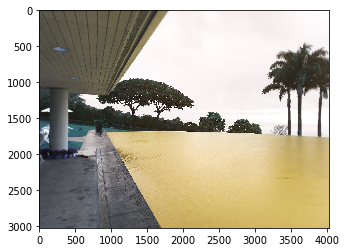

In [11]:
plt.imshow(img)

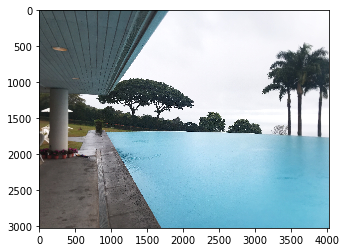

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.axis("off")
# plt.show()

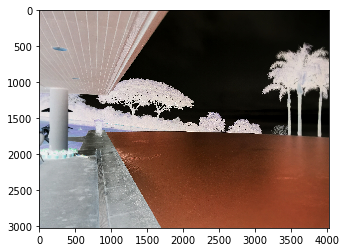

In [13]:
# 반전(네거티브) 처리
img2 = 255 - img
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

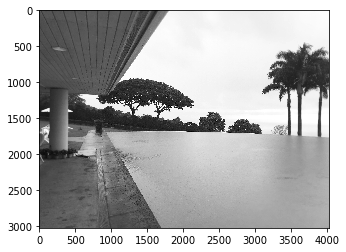

In [15]:
# 그레이로 변환
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap='gray')

In [18]:
# dir(cv2)

In [19]:
j=[]
for i in dir(cv2):
    if i.startswith('COLOR_'):
        j.append(i)
        
j[:3]

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']

In [20]:
[i for i in dir(cv2) if i.startswith('COLOR_')][:3]    # same as the above

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA']

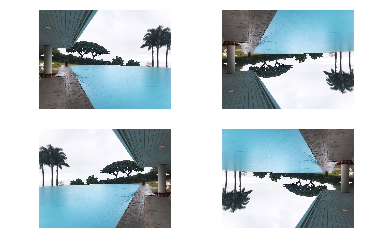

In [21]:
# 영상의 반전 (x-axis, y-axis, both axes)
plt.subplot(2,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.flip(img,0), cv2.COLOR_BGR2RGB)) # flip around x-axis
plt.subplot(2,2,3)
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.flip(img,1), cv2.COLOR_BGR2RGB)) # flip arund y_axis
plt.subplot(2,2,4)
plt.axis("off")
plt.imshow(cv2.cvtColor(cv2.flip(img,-1), cv2.COLOR_BGR2RGB)) # flip around both axis


## 저장하기

In [22]:
cv2.imwrite("pool_2.jpg", img)

True

In [35]:
# help(img)
img.all()  # Returns True if all elements evaluate to True.
import numpy as np
test = np.array([1,1,1,1,2])
test.all()

True

In [36]:
img2 = cv2.imread("pool_2.jpg")
if img.all() == img2.all():    # array with multi-elements
    print("Same")
else:
    print("different")

Same


## 크기 자르기

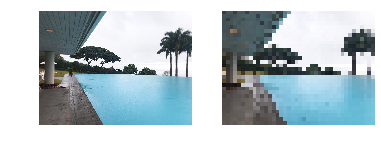

In [37]:
# 폭과 높이 조정
img2 = cv2.resize(img, (40, 30))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [38]:
img.shape, img2.shape

((3024, 4032, 3), (30, 40, 3))

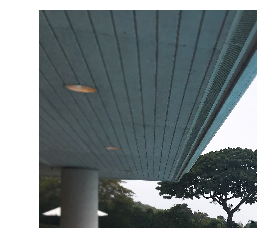

In [39]:
img2 = img[0:1500, 0:1500]
# im2 = cv2.resize(img, (600, 300))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# 얼굴을 검출하는 기능
- Haar-like 특징 학습기 사용한다. 눈, 코, 입 부분의 명암의 패턴을 인식
- 얼굴 특징 데이터베이스인 캐스케이드 파일 필요 (haarcascade 검색하면 됨
- https://github.com/opencv/opencv/tree/master/data/haarcascades


### Haar-cascade Detection in OpenCV
- OpenCV comes with a trainer as well as detector. If you want to train your own 
classifier for any object like car, planes etc. you can use OpenCV to create one. 
Its full details are given here: Cascade Classifier Training (https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html)
- Here we will deal with detection. OpenCV already contains many pre-trained 
classifiers for face, eyes, smiles, etc. Those XML files are stored in 
the opencv/data/haarcascades/ folder. 

In [40]:
!curl -L https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_alt.xml \
    -o haar.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   170  100   170    0     0    340      0 --:--:-- --:--:-- --:--:--   340

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (35) schannel: failed to receive handshake, SSL/TLS connection failed


In [41]:
# !ls -al ha*
!dir 

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 264E-2F1C

 C:\Users\rta_note\Desktop\Lab_M34 디렉터리

2019-11-27  오후 03:30    <DIR>          .
2019-11-27  오후 03:30    <DIR>          ..
2019-10-24  오전 10:04    <DIR>          .ipynb_checkpoints
2019-07-20  오후 01:21             3,258 baseline-script.csv
2019-07-21  오후 07:28           659,240 bike_train.csv
2019-10-24  오전 10:03        68,606,236 cats_and_dogs_filtered.zip
2019-07-20  오후 01:17             5,221 decision-tree.dot
2019-08-05  오후 06:13             8,587 digit2.png
2019-08-05  오후 06:20             9,344 digit2_2.png
2019-08-05  오후 06:13             7,431 digit9.png
2019-08-05  오후 06:14             8,408 digit9_2.png
2019-08-05  오후 06:21            33,284 digit9_3.png
2019-08-05  오후 06:21            24,365 digit9_4.png
2019-08-05  오후 07:09             6,067 digits.pkl
2019-08-05  오후 05:02         5,955,180 face-detect.png
2019-08-05  오후 05:03            58,609 face-pickup.png
2019-08-05  오후 05:00         1,774,696 families.jpg
2019-07-20  오전 1

In [42]:
# 캐스케이드 파일 지정해서 검출기 생성
cascade_file = "haar.xml"
cascade = cv2.CascadeClassifier(cascade_file)

In [43]:
# 이미지를 읽어 들이고 그레이스케일로 변환
# https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg
!curl -L https://www.dropbox.com/s/88q6oxlu03twfze/families.jpg -o families.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 23 1733k   23  398k    0     0   169k      0  0:00:10  0:00:02  0:00:08  481k
 68 1733k   68 1182k    0     0   345k      0  0:00:05  0:00:03  0:00:02  625k
100 1733k  100 1733k    0     0   445k      0  0:00:03  0:00:03 --:--:--  734k


In [44]:
img = cv2.imread("families.jpg")

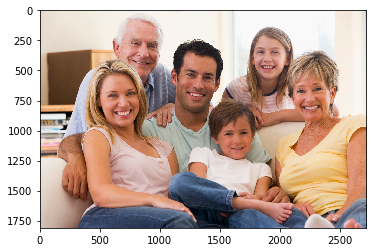

In [45]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [46]:
img.shape

(1810, 2716, 3)

In [64]:
# 얼굴 인식하기
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
# 결과 확인하기
if len(face_list) == 0:
    print("얼굴 인식 실패")
    quit()
# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x, y, w, h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=20)

얼굴의 좌표 = 674 140 385 385
얼굴의 좌표 = 2064 531 355 355
얼굴의 좌표 = 482 552 393 393
얼굴의 좌표 = 1735 232 315 315
얼굴의 좌표 = 1460 897 340 340
얼굴의 좌표 = 1124 389 402 402


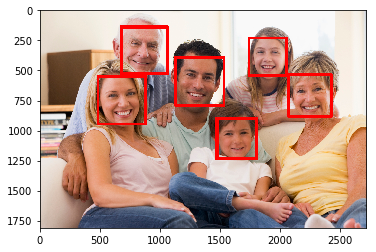

In [65]:
# 이미지 출력하기
cv2.imwrite("face-detect.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [66]:
x,y,w,h

(1124, 389, 402, 402)

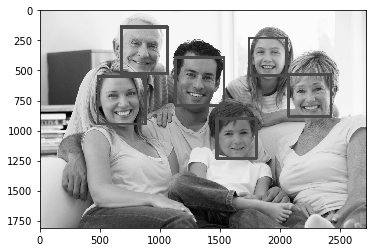

In [67]:
# 그레이 이미지로 출력하기
slice = img_gray[x:x+w, y:y+h]
cv2.imwrite("face-pickup.png", slice)
# cv2.rectangle(img_gray, (x, y), (x+w, y+h), red, thickness=10)
plt.imshow(img_gray, cmap="gray")
plt.show()

In [68]:
def mosaic(img, rect, size):
    # 모자이크 적용할 부분 추출하기
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # 축소하고 확대하기
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 모자이크 적용하기
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

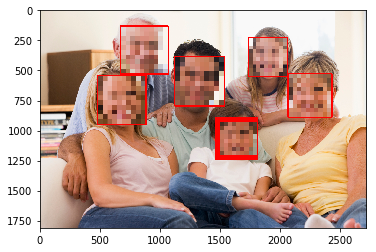

In [69]:
# 얼굴 부분만 모자이크 처리하기
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

# 이미지 출력하기
# cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()